# Chanper4: Chapter 4. NumPy Basics: Arrays and Vectorized Computation

In [15]:
 import numpy as np

In [16]:
# パフォーマンスチェック
np_arr=np.arange(10000)
list_arr=list(range(10000))

In [17]:
%time  for _ in  range(10) : np_arr2=np_arr**2

CPU times: user 743 µs, sys: 891 µs, total: 1.63 ms
Wall time: 780 µs


In [18]:
%time  for _ in range(10) : list_arr2=[x**2 for x in list_arr]

CPU times: user 31.7 ms, sys: 1.14 ms, total: 32.8 ms
Wall time: 31.9 ms


In [19]:
a=np.zeros((2,3))
np.ones_like(a)
a

array([[0., 0., 0.],
       [0., 0., 0.]])

In [20]:
# キャスト
cs=np.arange(10)


print(cs)
print(cs)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [33]:
# boolを使用してのフィルター

names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
datas=np.random.randn(7,7)
print(datas)

# or で設定
datas[(names=='Bob')|( names=='Joe' )]
# 否定
datas[~(names=='Bob')]
# 列の指定
datas[names=='Bob',:1]

# dataのフィルタ
datas[datas<1]

[[-1.98286434  1.18585191 -0.17995093  0.62987166  1.15891816  0.46049922
   0.55969483]
 [ 0.41256837  1.15944838 -0.30254625  0.47392728  2.41460495  1.07889128
   0.51484342]
 [-1.05118848  0.63978289  1.52404199 -1.2624466  -0.40517201  1.2233036
   1.52915202]
 [ 0.67466845  0.26205904 -1.44773959  1.2189347  -1.08852006  0.07410815
   0.04976044]
 [-0.92180938  0.68687039  0.22883891  0.96728241 -0.72095096  0.83076942
  -1.48789621]
 [-0.37545895  0.03857753 -2.01235888 -0.44479486 -0.61996921 -2.01134487
  -1.03992544]
 [-1.73864183  0.42725569 -1.2829631  -0.75778471 -0.76358985  1.06969833
  -1.22131731]]


array([-1.98286434, -0.17995093,  0.62987166,  0.46049922,  0.55969483,
        0.41256837, -0.30254625,  0.47392728,  0.51484342, -1.05118848,
        0.63978289, -1.2624466 , -0.40517201,  0.67466845,  0.26205904,
       -1.44773959, -1.08852006,  0.07410815,  0.04976044, -0.92180938,
        0.68687039,  0.22883891,  0.96728241, -0.72095096,  0.83076942,
       -1.48789621, -0.37545895,  0.03857753, -2.01235888, -0.44479486,
       -0.61996921, -2.01134487, -1.03992544, -1.73864183,  0.42725569,
       -1.2829631 , -0.75778471, -0.76358985, -1.22131731])

In [ ]:
# ファンシーインデックス

arr=np.empty((8,4))
for i in range(len(arr)):
    arr[i]=i
print(arr)
arr[[0,4,-1]]
arr[[1,3]][:,[2,2]]

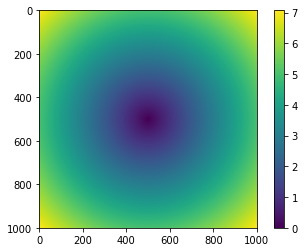

In [25]:
# ベクトル化により、明示的にループを書く必要はなくなる
points=np.arange(-5,5,0.01)
xs,ys=np.meshgrid(points,points)
z=np.sqrt(xs**2+ys**2)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(z);plt.colorbar()

In [ ]:
# whereを使って、二値化する
data=np.random.randn(4,4)


np.where(data>1,1,0)
# もとの値を使用する場合
np.where(data>1,1,data)

In [ ]:
# sort
rnd=np.random.randn(100)
# mutableな操作
rnd.sort()
# 5%目の値
rnd[int(0.05*len(rnd))]
data=np.random.randint(1,10,40)
# uniqueはsort下後に重複を排除している
np.unique(data)

In [ ]:
# ディスクからのloadとsave
# save
data=np.random.randint(1,100,1000)
np.save('rand_int',data)

# load
np.load('rand_int.npy')

# 複数の行列を圧縮せずに保存
data2=np.random.randint(1,3,9)
np.savez('muuncdata',a=data,b=data2)
# 複数の行列を圧縮して保存
np.savez_compressed('mucdata',a=data,b=data2)

data2=np.load('mucdata.npz')
data2['b']

In [ ]:
# 線形代数

x = np.array([[1., 2., 3.], [4., 5., 6.]])
ones=np.ones((3,3))

# ver3.5から@で行列の掛け算が可能
dot=x @ ones

print(dot==np.dot(x,ones))

# linalgの中にはもろもろ便利なライブラリが存在
from numpy.linalg import inv,qr

# 逆行列
X=np.random.randn(5,5)
ele=X@ inv(X)
print(ele)

# QR分解
q,r=qr(X)
print(r)

True


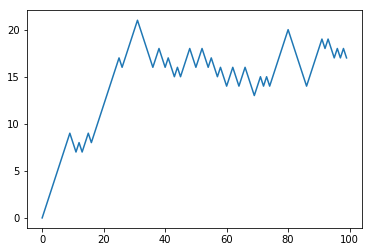

In [26]:
# ランダム
import random


# 一次元上でのランダムウォーク
position=0
walk=[position]
steps=1000
for i in range(steps):
    #  pythonでは0==True 1=False
    step= 1 if random.randint(0,1) else -1
    position+=step
    
    walk.append(position)
    
plt.plot(walk[:100])
walk=np.array(walk)   
print(walk.max()==walk[walk.argmax()])



[[  1   0   1 ...  22  23  24]
 [ -1  -2  -1 ...  34  33  34]
 [ -1  -2  -3 ...  -4  -3  -2]
 ...
 [  1   2   3 ... -26 -27 -28]
 [ -1  -2  -1 ...   6   5   4]
 [  1   0   1 ... -10  -9  -8]]


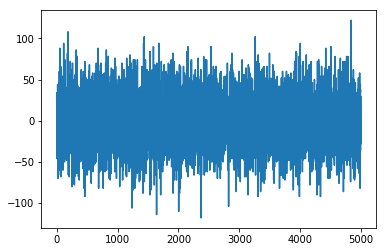

In [31]:
# 5000人でのランダムウォーク
nwalks=5000
nsteps=1000

draws=np.random.randint(0,2,size=(nwalks,nsteps))
# 規格化
steps=np.where(draws>0,1,-1)

# ステップごとの合計
walks=steps.cumsum(1)

print(walks)

# 最終的な到達位置をplot
plt.plot(walks[:,-1])